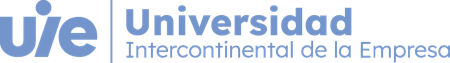

**G25GXX3.10X. Aprendizaje Automático**

**Profesor: Borja González Seoane**

Curso 2025-26

In [1]:
__author__ = "Alex Caride Cid"

# PLD6. Implementación de _K-means_ _Scratch_

En esta práctica se trabajará en la implementación del algoritmo de clusterizción _K-means_. El objetivo es implementar el algoritmo y probarlo con un conjunto de datos sintético que se puede generar con la función `make_blobs` de `sklearn.datasets`.

Se implementará _K-means_ en una clase arquetipo como en prácticas anteriores. Se proporciona el esqueleto _a posteriori_. Una vez implementado el algoritmo, se exportará la clase a un fichero `.py` para poder importarla en el siguiente _notebook_, donde se probará con un conjunto real y se comparará con la implementación de Scikit-Learn.


In [2]:
from typing import Literal, Optional
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# Más importaciones...
import sklearn.datasets
import sklearn.model_selection

In [3]:
TEST_SPLIT_SIZE = 0.5
RANDOM_STATE = 7

# Set NumPy's random seed
np.random.seed(RANDOM_STATE)

## Carga del conjunto de datos

In [4]:
data= sklearn.datasets.make_blobs(
    n_samples=1000,
    n_features=3,
    centers=3,
    random_state=RANDOM_STATE
)

In [5]:
display(data)

(array([[ 4.02225571,  9.56510618,  1.02648726],
        [-6.80536989,  5.78520276,  0.66617147],
        [-8.94034802,  5.9533827 , -1.19527544],
        ...,
        [ 4.00082525,  9.38889756,  0.6331773 ],
        [-8.68557396,  5.48364939, -1.52077852],
        [-7.13253377,  4.34551145, -1.91858412]], shape=(1000, 3)),
 array([1, 0, 0, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 0, 2, 1,
        0, 1, 0, 0, 0, 0, 0, 1, 2, 2, 0, 1, 2, 2, 0, 0, 0, 0, 1, 2, 2, 0,
        1, 2, 0, 2, 2, 1, 1, 1, 2, 2, 2, 0, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
        2, 1, 2, 0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1,
        2, 0, 2, 0, 2, 2, 2, 2, 1, 0, 1, 2, 2, 1, 1, 1, 1, 0, 0, 1, 2, 0,
        1, 1, 0, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 0, 1, 0, 2, 0, 1, 0,
        1, 2, 2, 2, 2, 1, 1, 2, 0, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 0, 1,
        1, 0, 0, 2, 2, 1, 2, 2, 0, 2, 1, 0, 1, 0, 0, 1, 2, 0, 2, 1, 2, 0,
        0, 2, 1, 2, 0, 1, 2, 2, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 2, 2,
        

In [6]:
X=data[0]
y=data[1]

In [7]:
def plot_data_3D(
    data: np.ndarray, labels: Optional[np.ndarray] = None, title: Optional[str] = None
) -> None:
    """
    Función auxiliar para graficar datos en 3D. Se espera que `X` tenga 3 columnas.

    :param X: Datos a graficar.
    :param labels: Etiquetas de los datos, para colorearlos. Si no se proveen, los datos se grafican en un único color.
    :param title: Título del gráfico.
    """
    assert data.shape[1] == 3, "Se esperan 3 columnas en X."

    # Use Seaborn style
    plt.style.use("default")
    # Ignore the Matplotlib deprecation warnings
    plt.rcParams.update({"figure.max_open_warning": 0})

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection="3d")

    if labels is None:
        ax.scatter(data[:, 0], data[:, 1], data[:, 2], s=100)
    else:
        ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, s=100, cmap=cm.jet)

    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    if title is not None:
        ax.set_title(title)

    plt.show()

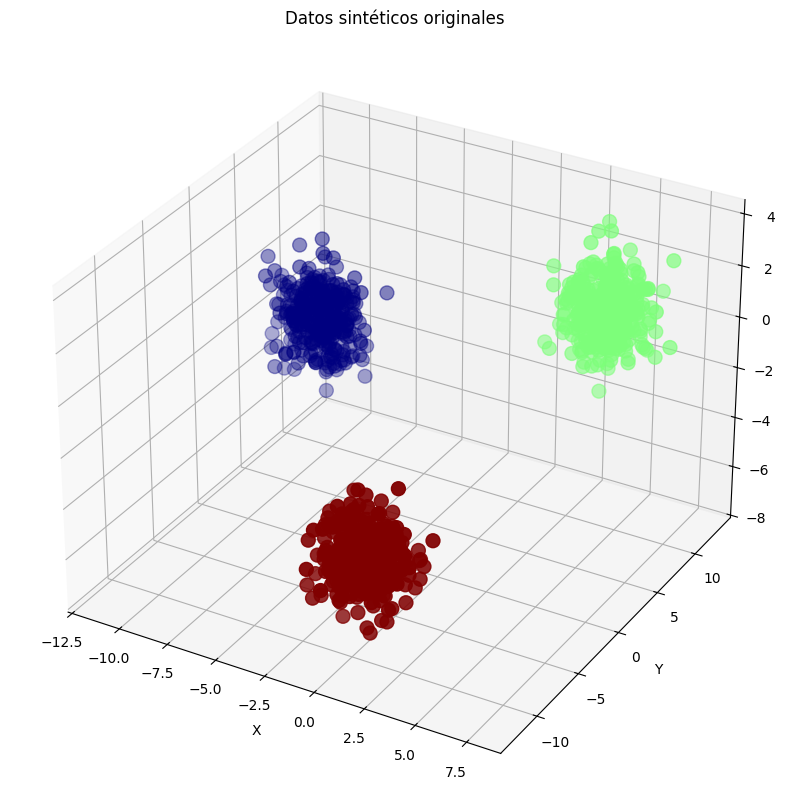

In [8]:
plot_data_3D(X, y, title="Datos sintéticos originales")

## Partición de los datos

Se reserva un subconjunto de test.

In [9]:
X_train, X_test= sklearn.model_selection.train_test_split(
    X,
    test_size=TEST_SPLIT_SIZE,
    random_state=RANDOM_STATE
    
)

In [10]:
display(X_train)
display(X_test)

array([[  4.51964339,  11.41103424,  -0.56114198],
       [ -6.80244861,   5.34264705,  -2.36073917],
       [ -7.91567905,   6.93146962,  -2.04850192],
       ...,
       [  5.67769443,  10.13625152,   0.80285527],
       [  0.22775011,  -6.87762628,  -5.499853  ],
       [-11.32104757,   5.6519978 ,   0.62536949]], shape=(500, 3))

array([[ -6.9697534 ,   6.21611788,  -1.06532363],
       [  5.91545085,   9.9183046 ,   0.68001707],
       [  1.25553388, -10.61366141,  -5.43220486],
       ...,
       [  5.1118426 ,   9.85196455,   0.58552352],
       [-10.30002317,   4.30412052,  -2.38792397],
       [  0.63381065,  -8.31497869,  -5.96141871]], shape=(500, 3))

## Implementación de _K-means_ _Scratch_

Se implementa el algoritmo de _K-means_ en una clase arquetipo.

In [11]:
class KMeansScratch:
    def __init__(
        self,
        k: int,
        max_iter: int = 1000,
        random_state: Optional[int] = None,
        tol: float = 1e-4,  # Tolerancia para la convergencia. Frobenius
        init: Literal["random", "k-means++"] = "random",
    ):
        # Validación de parámetros
        # k, max_iter: enteros positivos
        # tol: positivo

        self.k = k
        self.max_iter = max_iter
        self.random_state = random_state
        self.tol = tol
        self.init = init

        self._centroides = None
        self._labels = None
        self._inertia = None
        self._n_iter = 0
    
    def __inicializa_centroides(self, X: np.ndarray) -> np.ndarray:
        rng = np.random.default_rng(self.random_state)
        if self.init == "random":
           return self.__inicializa_centroides_random(X, rng)
        elif self.init == "k-means++":
           return self.__inicializa_centroides_mas_mas(X, rng)
        else:
           raise ValueError(f"Método de inicialización '{self.init}' no soportado.")
        
        
    def __inicializa_centroides_random(self, X: np.ndarray,
        rng: np.random.Generator
    ) -> np.ndarray:
        indices = rng.choice(X.shape[0], self.k, replace=False)
        return X[indices].copy()
    
    
    def __inicializa_centroides_mas_mas(self, X: np.ndarray,
       rng: np.random.Generator
    ) -> np.ndarray:
        centroides = np.zeros((self.k, X.shape[1]))
        
        # Elegimos el primer centroide aleatoriamente
        indices = rng.choice(X.shape[0], 1, replace=False)
        centroides[0] = X[indices].copy()
        
        for k in range(1, self.k):
            # Calculamos la distancia mínima de cada punto a los centroides ya elegidos
            distancias = np.min(
                np.sum((X[:, np.newaxis, :] - centroides[np.newaxis, :k, :]) ** 2, axis=2),
                axis=1
            )
            # Probabilidad proporcional a la distancia al cuadrado
            probabilidad = distancias / np.sum(distancias)
            indice_elegido = rng.choice(X.shape[0], 1, p=probabilidad)
            centroides[k] = X[indice_elegido].copy()
        
        return centroides


    def __asignar_clusteres(self, X: np.ndarray) -> np.ndarray:
        
        distancias = np.zeros((X.shape[0], self.k))

        for k in range(self.k):
            # Distancia a cada punto con respecto al centroide 'k'
            distancias[:, k] = np.sum((X - self._centroides[k]) ** 2, axis=1)

        return np.argmin(distancias, axis=1)
    

    def __actualizar_centroides(self, X: np.ndarray,
                                 clusteres: np.ndarray) -> np.ndarray:
        centroides = np.zeros(
            (self.k, X.shape[1]))
        
        for k in range(self.k):
            mask = clusteres == k

            centroides[k] = np.mean(X[mask], axis=0)
            
        return centroides


    

    def __convergencia_frobenius(self,
                                centroides_antiguos: np.ndarray,
                                centroides_nuevos: np.ndarray,
                                tol: float) -> bool:
        norma_frobenius = np.linalg.norm(
            centroides_nuevos - centroides_antiguos,
              ord='fro')
        return bool(norma_frobenius < tol)


    def fit(self, X: np.ndarray):
        self._centroides = self.__inicializa_centroides(X)
        self._n_iter = 0

        for iter_n in range(self.max_iter):
            self._n_iter += 1

            # Asignamos clusters
            self._labels = self.__asignar_clusteres(X)

            # Actualizamos centroides
            centroides_nuevos = self.__actualizar_centroides(X, self._labels)

            if self.__convergencia_frobenius(self._centroides,
                 centroides_nuevos,
                 self.tol):
                break
            self._centroides = centroides_nuevos

    def predict(self, X: np.ndarray) -> np.ndarray:
        if self._centroides is None:
            raise ValueError("El modelo no ha sido entrenado todavía. Llámase a 'fit()' primero.")
        
        return self.__asignar_clusteres(X)

        

## Se instancia y entrena modelo

In [12]:
modelo= KMeansScratch(k=3, random_state=RANDOM_STATE, init='random')
modelo.fit(X_train)

clusteres_train= modelo.predict(X_train)
clusteres_test= modelo.predict(X_test)

## Evaluación del modelo


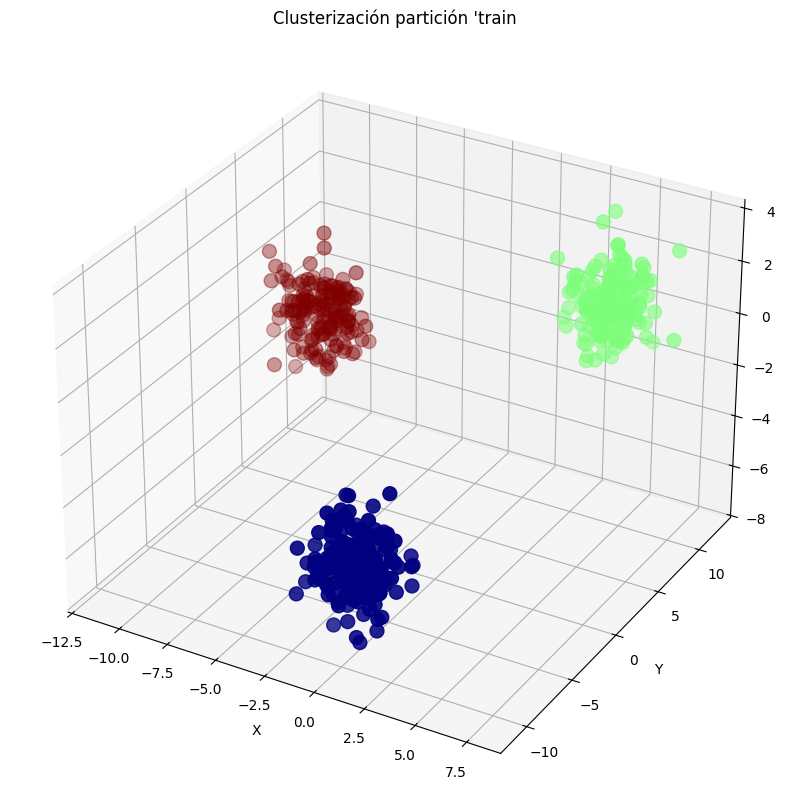

In [13]:
plot_data_3D(
    X_train,
    labels=clusteres_train,
    title="Clusterización partición 'train"
)

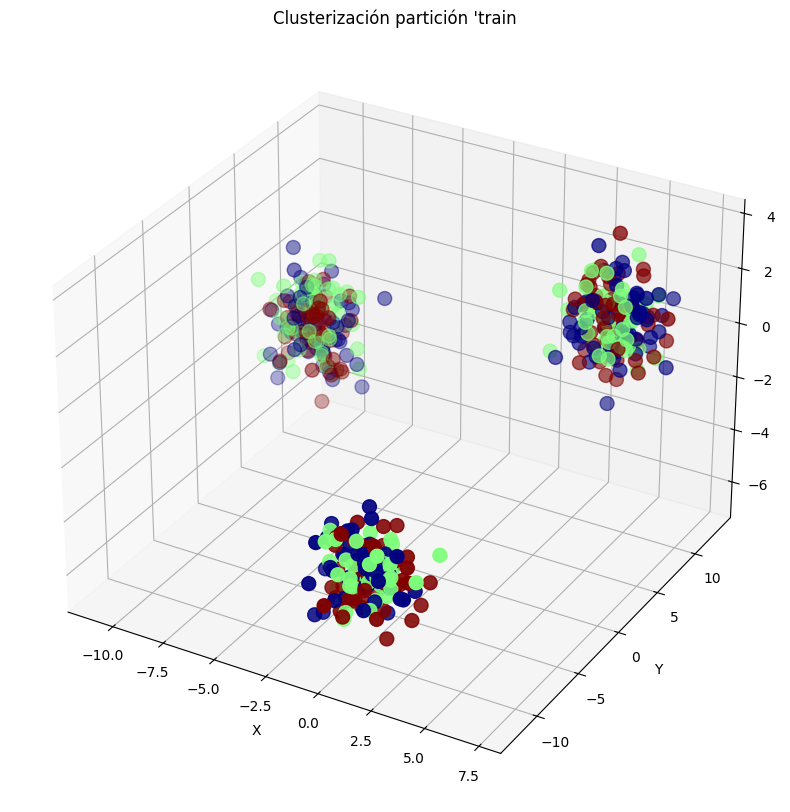

In [14]:
plot_data_3D(
    X_test,
    labels=clusteres_train,
    title="Clusterización partición 'train"
)